1. Chargement et préparation des données...
   Nombre de valeurs manquantes à imputer (Dimension): 1434
   Bornes pour l'optimisation: [-4.9575, 4.3956]
   Nombre de caractéristiques pour la sélection: 9

2. Démarrage de l'optimisation hybride SCA-GWO...
   Paramètres SCA (imputation): Pop=10, Epochs=30
   Paramètres GWO (sélection de caractéristiques): Pop=10, Epochs=30
   ATTENTION: Ce processus peut être très long !
--- Évaluation initiale de la population SCA (avec GWO interne) ---
Agent 1/10 évalué. Accuracy: 0.594125
Agent 2/10 évalué. Accuracy: 0.606715
Agent 3/10 évalué. Accuracy: 0.603118
Agent 4/10 évalué. Accuracy: 0.594125
Agent 5/10 évalué. Accuracy: 0.595324
Agent 6/10 évalué. Accuracy: 0.604317
Agent 7/10 évalué. Accuracy: 0.602518
Agent 8/10 évalué. Accuracy: 0.591727
Agent 9/10 évalué. Accuracy: 0.570743
Agent 10/10 évalué. Accuracy: 0.598321
Meilleure Accuracy initiale: 0.606715

--- Démarrage de la boucle principale SCA (Époques: 30) ---
Époque 1/30, Évaluation de l'

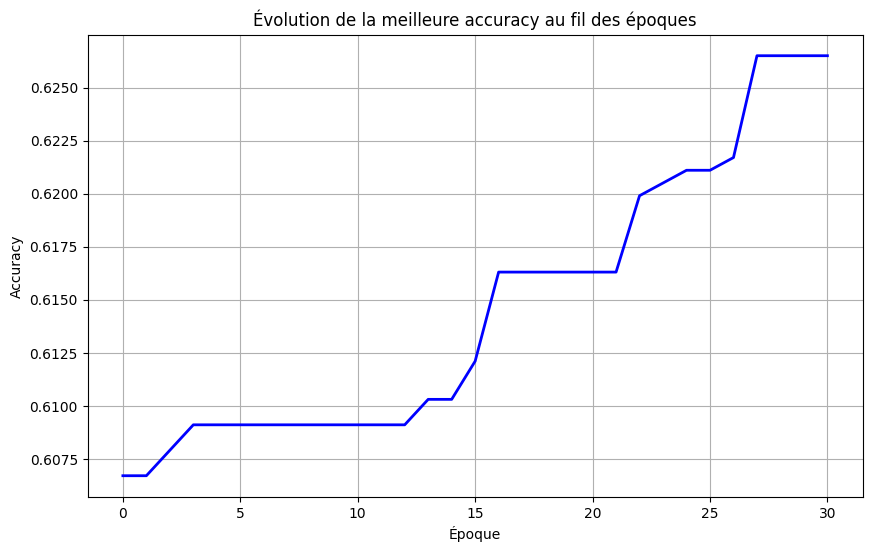


--- Optimisation Terminée ---
Meilleure Accuracy KNN: 0.6265
Nombre de caractéristiques sélectionnées: 5
Indices des caractéristiques sélectionnées: [0 1 3 4 5]


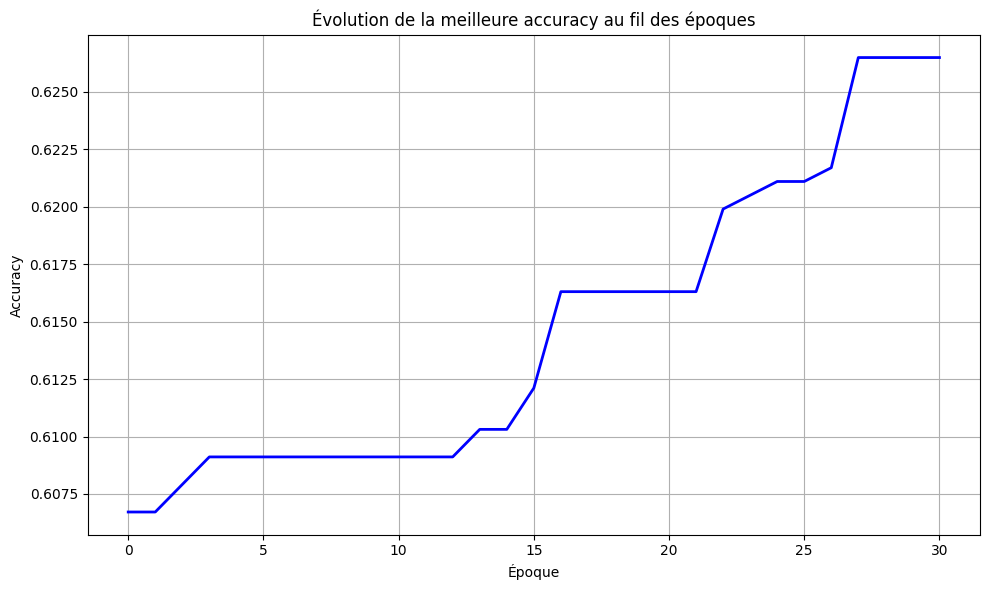


Le graphique de l'évolution de l'accuracy a été sauvegardé dans 'evolution_accuracy.png'


In [1]:
from data_handler import load_and_prepare_data
from sca_hybrid import run_hybrid_sca_gwo_from_scratch
import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__":
    # Paramètres
    CSV_PATH = '../water_potability.csv'
    SCA_POP_SIZE = 10  
    SCA_EPOCHS = 30   
    GWO_POP_SIZE = 10 
    GWO_EPOCHS = 30    

    print("1. Chargement et préparation des données...")
    try:
        problem_info = load_and_prepare_data(CSV_PATH)
        print(f"   Nombre de valeurs manquantes à imputer (Dimension): {problem_info['dim']}")
        print(f"   Bornes pour l'optimisation: [{problem_info['lower_bound']:.4f}, {problem_info['upper_bound']:.4f}]")
        print(f"   Nombre de caractéristiques pour la sélection: {problem_info['n_features']}")
    except ValueError as e:
        print(f"Erreur: {e}")
        exit()
    except FileNotFoundError:
        print(f"Erreur: Le fichier {CSV_PATH} n'a pas été trouvé.")
        exit()

    print("\n2. Démarrage de l'optimisation hybride SCA-GWO...")
    print(f"   Paramètres SCA (imputation): Pop={SCA_POP_SIZE}, Epochs={SCA_EPOCHS}")
    print(f"   Paramètres GWO (sélection de caractéristiques): Pop={GWO_POP_SIZE}, Epochs={GWO_EPOCHS}")
    print("   ATTENTION: Ce processus peut être très long !")

    result = run_hybrid_sca_gwo_from_scratch(
        problem_info,
        sca_pop_size=SCA_POP_SIZE,
        sca_epochs=SCA_EPOCHS,
        gwo_pop_size=GWO_POP_SIZE,
        gwo_epochs=GWO_EPOCHS
    )

    print("\n--- Optimisation Terminée ---")
    print(f"Meilleure Accuracy KNN: {result['accuracy']:.4f}")
    print(f"Nombre de caractéristiques sélectionnées: {len(result['selected_feature_indices'])}")
    print(f"Indices des caractéristiques sélectionnées: {result['selected_feature_indices']}")

    # Afficher le graphique de l'évolution de l'accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(range(SCA_EPOCHS + 1), result['history'], 'b-', linewidth=2)
    plt.title('Évolution de la meilleure accuracy au fil des époques')
    plt.xlabel('Époque')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('evolution_accuracy.png')
    plt.show()

    print("\nLe graphique de l'évolution de l'accuracy a été sauvegardé dans 'evolution_accuracy.png'")